In [23]:
# Load Libraries
library(tseries)
library(ggplot2)

#  Autoregressive Moving Average Model of Different Orders

In [2]:
# Data
speed=read.table(file="data/Speed.csv",header=FALSE,sep=",")
head(speed)

V1,V2
1,0.0000000
2,0.0000000
3,-2.0282805
4,-2.7775658
5,-0.2594288
6,0.6859657


Warning message in adf.test(speed$V2):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  speed$V2
Dickey-Fuller = -9.6065, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary



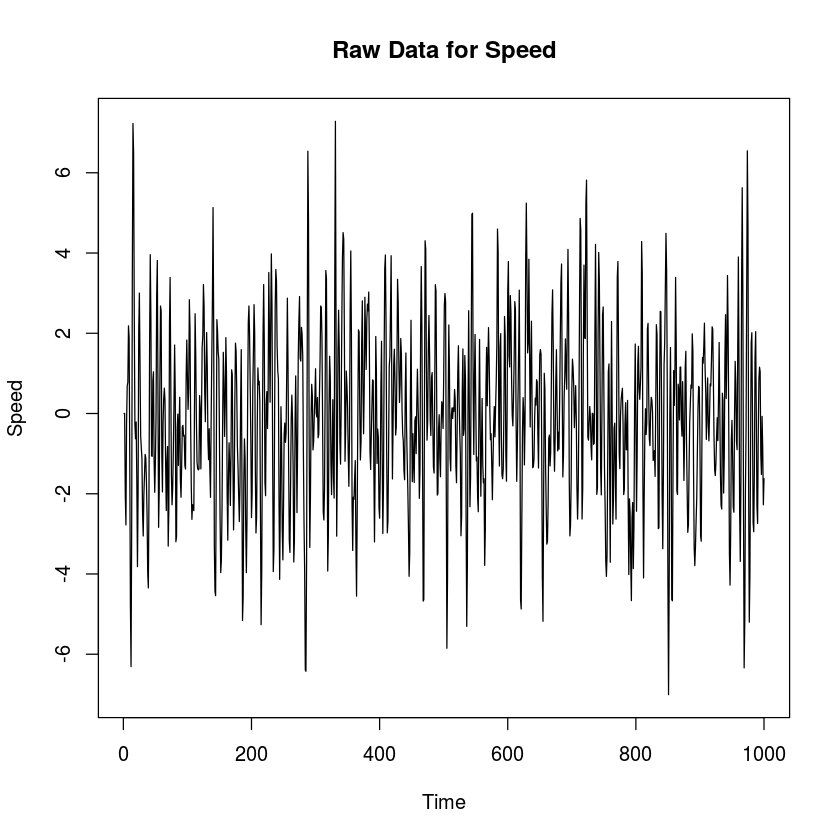

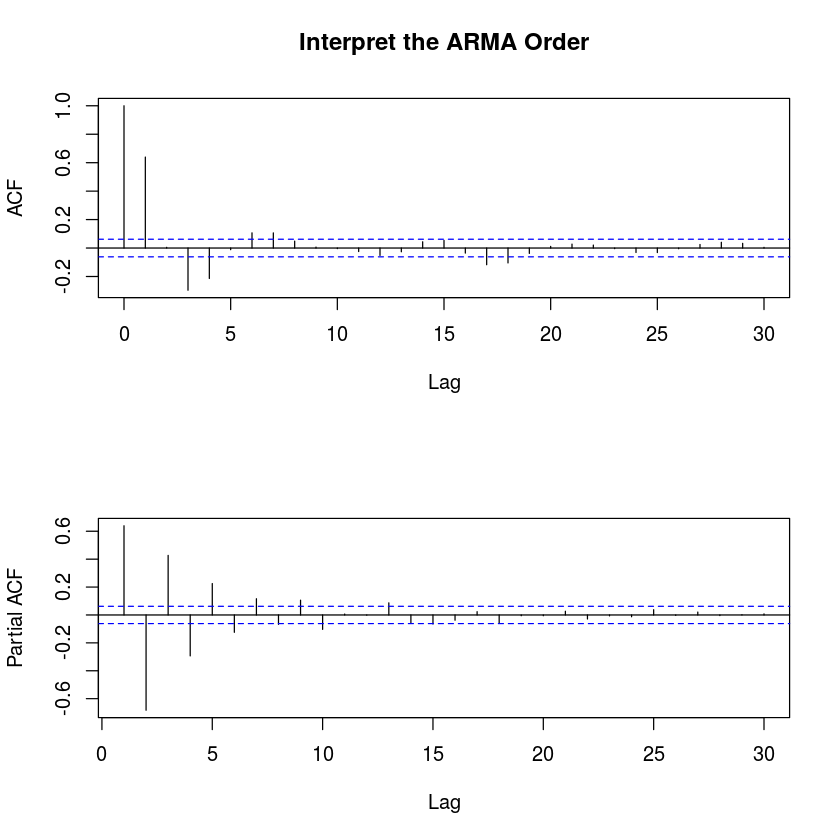

In [27]:
# Plot raw data, ACF, and PACF
print(adf.test(speed$V2))

plot(speed,type="l",main="Raw Data for Speed",xlab="Time",ylab="Speed")
par(mfrow=c(2,1))
acf(speed[,2],main="Interpret the ARMA Order")
pacf(speed[,2],main="")


Call:
arima(x = speed[, 2], order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.6390    -0.1164
s.e.  0.0243     0.1443

sigma^2 estimated as 2.722:  log likelihood = -1919.9,  aic = 3845.79


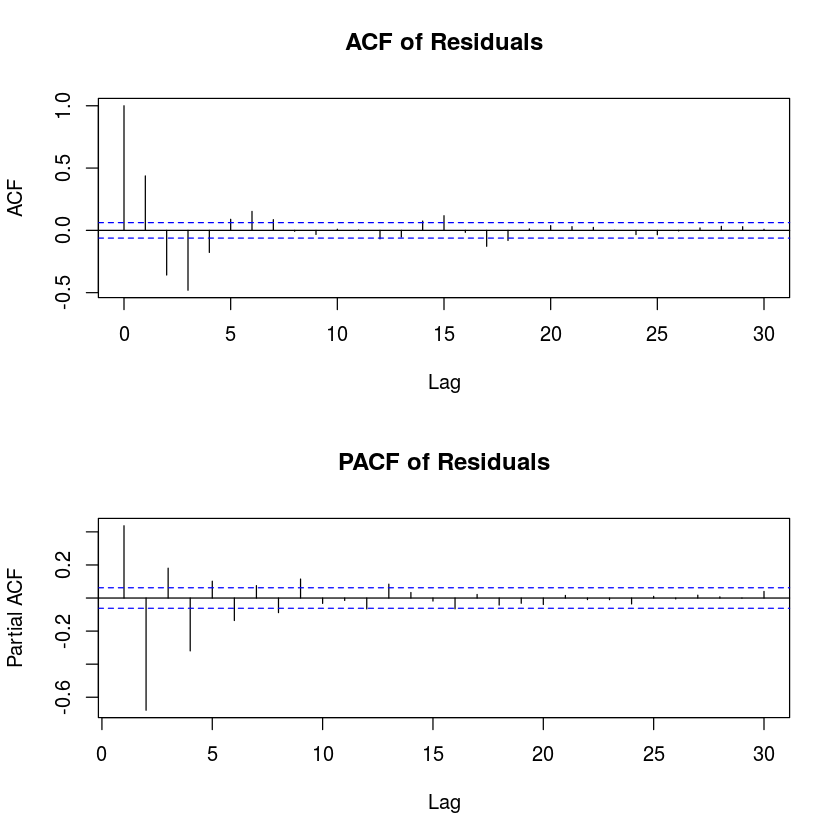

In [7]:
# Fit ARMA(1,0) model
Mod1 <- arima(speed[,2],order=c(1,0,0))
print(Mod1)
# Residuals Model 1
Mod1.residuals=Mod1$residuals
par(mfrow=c(2,1))
acf(Mod1.residuals, main="ACF of Residuals")
pacf(Mod1.residuals, main = "PACF of Residuals")


Call:
arima(x = speed[, 2], order = c(1, 0, 1))

Coefficients:
         ar1     ma1  intercept
      0.4926  0.9320    -0.1163
s.e.  0.0280  0.0102     0.1344

sigma^2 estimated as 1.249:  log likelihood = -1531.56,  aic = 3071.12


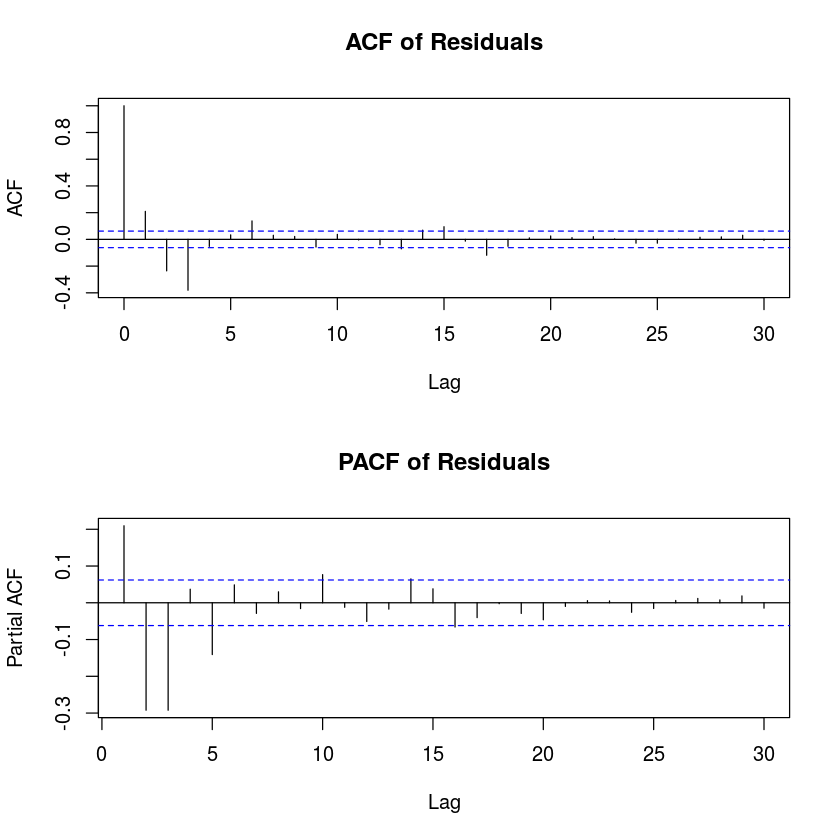

In [8]:
# Fit ARMA(1,1) model
Mod2 <- arima(speed[,2],order=c(1,0,1))
print(Mod2)
# Residuals Model 2
Mod2.residuals=Mod2$residuals
par(mfrow=c(2,1))
acf(Mod2.residuals, main="ACF of Residuals")
pacf(Mod2.residuals, main = "PACF of Residuals")


Call:
arima(x = speed[, 2], order = c(2, 0, 1))

Coefficients:
         ar1      ar2     ma1  intercept
      0.7831  -0.5018  0.8334    -0.1144
s.e.  0.0292   0.0290  0.0193     0.0797

sigma^2 estimated as 0.9762:  log likelihood = -1408.64,  aic = 2827.29

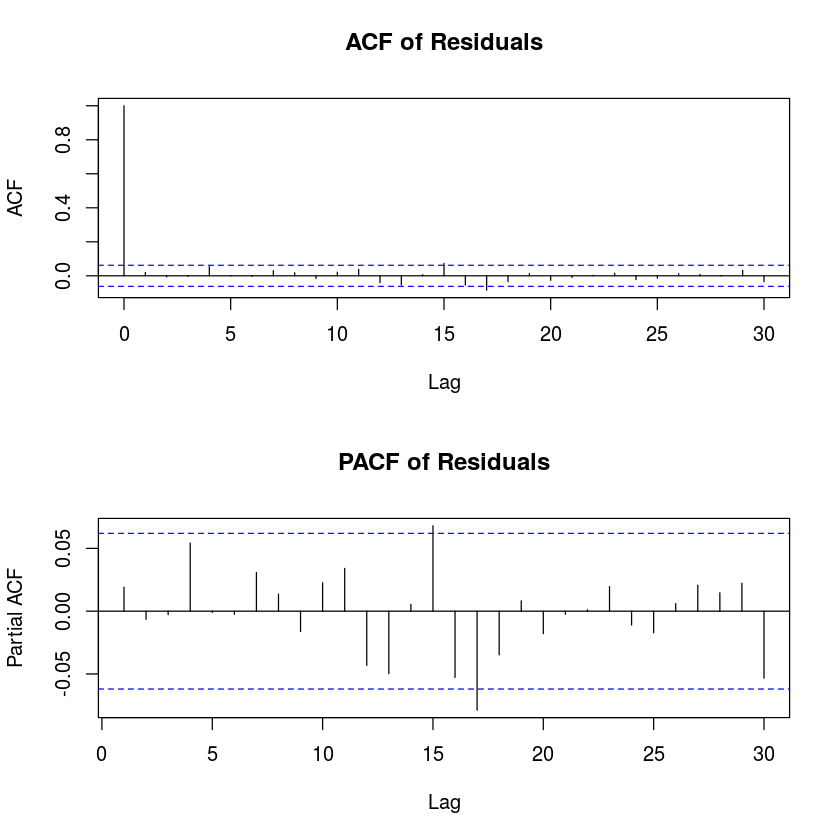

In [9]:
# Fit ARMA(2,1) model
Mod3 <- arima(speed[,2],order=c(2,0,1))
Mod3
# Residuals Model 3
Mod3.residuals=Mod3$residuals
par(mfrow=c(2,1))
acf(Mod3.residuals, main="ACF of Residuals")
pacf(Mod3.residuals, main = "PACF of Residuals")

# Autoregressive Moving Average Model – Differencing and Forecasting - Optional

In [11]:
# Data
beer=read.table(file="data/beer.csv",header=FALSE,sep=",")
head(beer)

V1,V2
1,0.0000000
2,0.6563480
3,0.9144392
4,3.2580306
5,6.1048556
6,6.3400109



	Augmented Dickey-Fuller Test

data:  a
Dickey-Fuller = -2.2409, Lag order = 9, p-value = 0.4763
alternative hypothesis: stationary



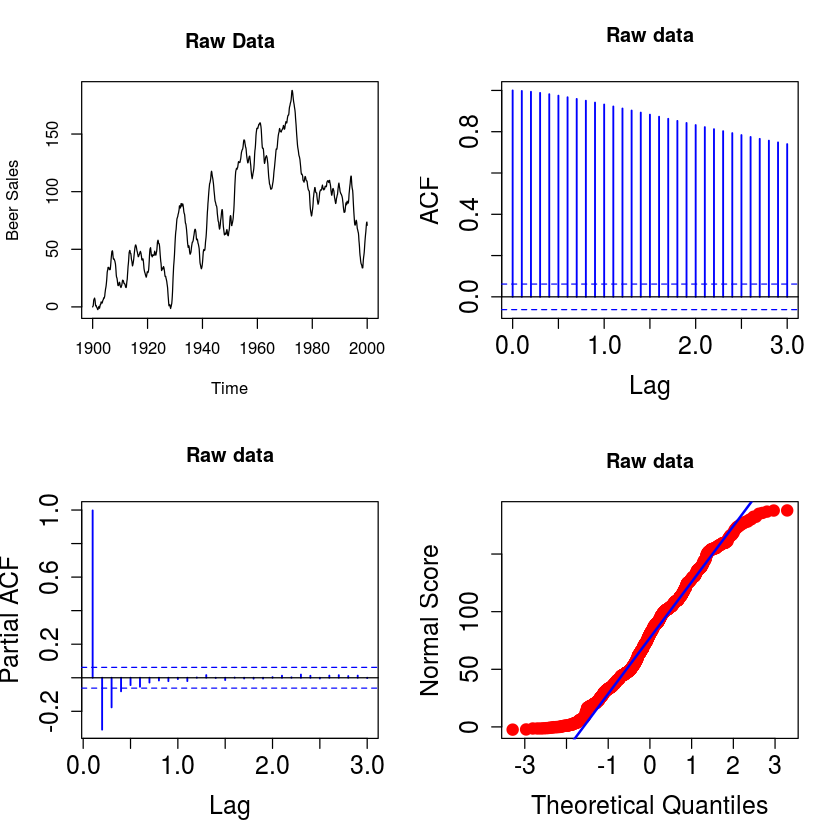

In [28]:
# Plot raw data, ACF, and PACF
# windows() # What is this for Sapna?
par(mfrow=c(2,2))
a=ts(beer[,2],start=1900,frequency=10)
print(adf.test(a))
plot(a,type="l",main="Raw Data",xlab="Time",ylab="Beer Sales")
# ACF and PACF plots of un-differenced data
acf(a,col='blue',lwd=1.5,cex.lab=1.5,cex.axis=1.5,main="Raw data")
pacf(a,col='blue',lwd=1.5,cex.lab=1.5,cex.axis=1.5,main="Raw data")
qqnorm(
    a,ylab='Normal Score',main='Raw data',
    pch=19,col='red',cex=1.5,cex.axis=1.5,cex.lab=1.5
)
qqline(a,lwd=2,col='blue')

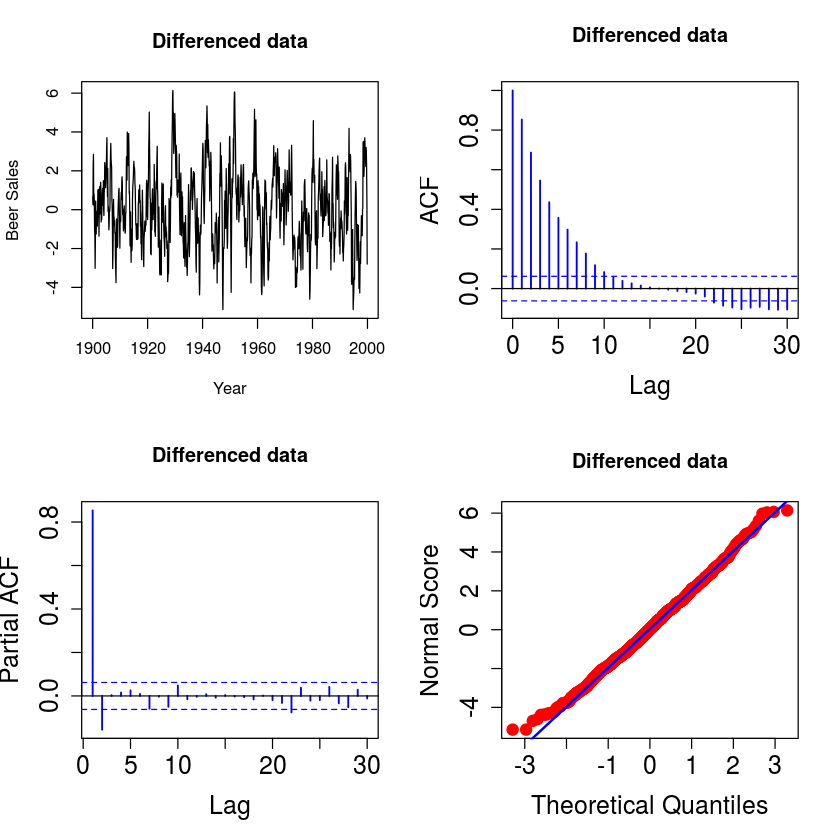

In [15]:
# Difference data and examine the residuals
beer.diff=diff(beer[,2])
b=ts(beer.diff,start=1900,frequency=10)
# windows()
par(mfrow=c(2,2))
plot(b,type="l",main="Differenced data",xlab="Year",ylab="Beer Sales")
acf(beer.diff,col='blue',lwd=1.5,cex.lab=1.5,cex.axis=1.5,main="Differenced data")
pacf(beer.diff,col='blue',lwd=1.5,cex.lab=1.5,cex.axis=1.5,main="Differenced data")
qqnorm(
    beer.diff,ylab='Normal Score',main='Differenced data',
    pch=19,col='red',cex=1.5,cex.axis=1.5,cex.lab=1.5
)
qqline(beer.diff,lwd=2,col='blue')


Call:
arima(x = a, order = c(1, 1, 1))

Coefficients:
         ar1     ma1
      0.8070  0.1836
s.e.  0.0214  0.0349

sigma^2 estimated as 0.9984:  log likelihood = -1418.81,  aic = 2843.62

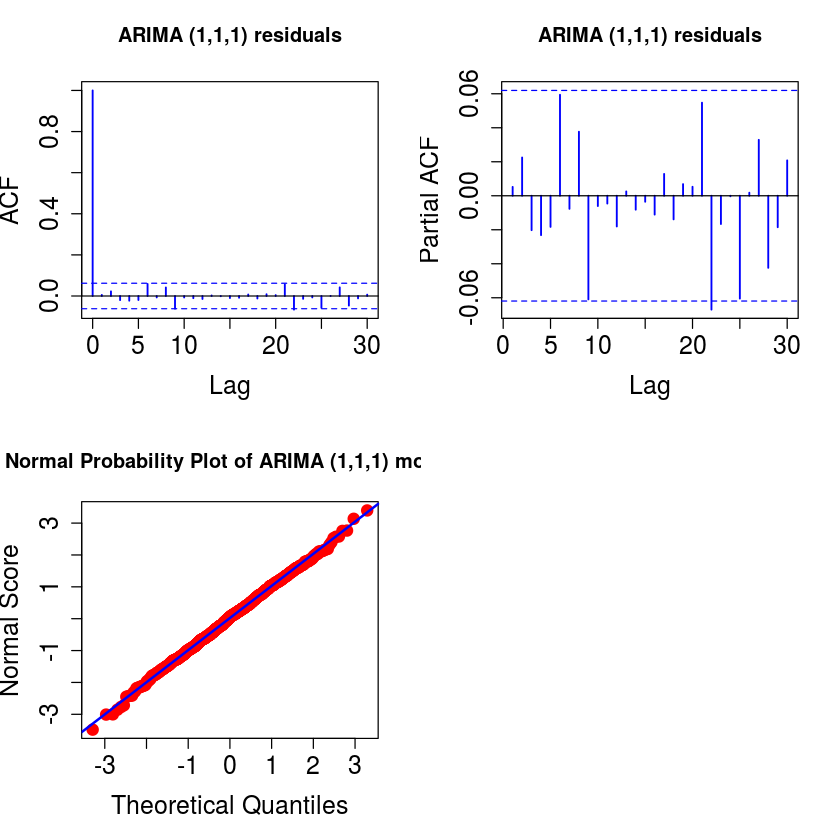

In [16]:
# Fit ARIMA (1,1,1) model
# ARIMA models have 3 components (p,d,q). The p and q components are the AR and MA terms
# respectively. The d component is the differencing component.
# Our differencing exercise (above) indicates that a model with a d component equal to 1 might
# fit the model.
Mod1 <- arima(a,order=c(1,1,1))
Mod1
err1 <- Mod1$residuals
err1 <- ifelse(is.na(err1),0,err1) # set NAs to 0
# Diagnostics on residuals
# windows()
par(mfrow=c(2,2))
acf(err1,col='blue',lwd=1.5,cex.lab=1.5,cex.axis=1.5,main="ARIMA (1,1,1) residuals")
pacf(err1,col='blue',lwd=1.5,cex.lab=1.5,cex.axis=1.5,main="ARIMA (1,1,1) residuals")
qqnorm(
    err1,ylab='Normal Score',main='Normal Probability Plot of ARIMA (1,1,1) model',
    pch=19,col='red',cex=1.5,cex.axis=1.5,cex.lab=1.5
)
qqline(err1,lwd=2,col='blue')

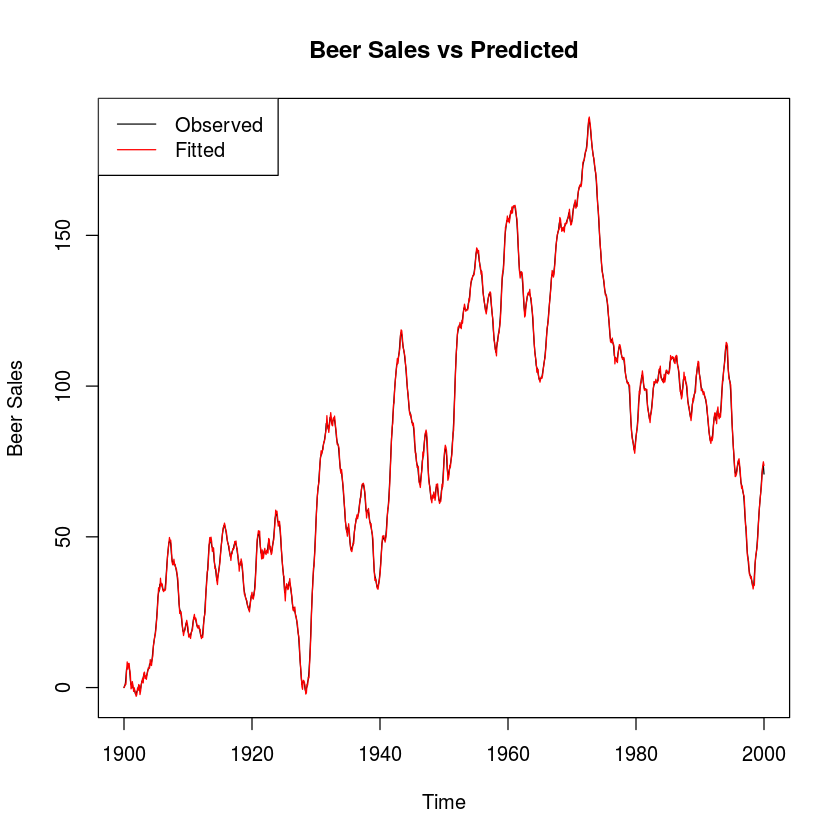

In [17]:
# How well do observed and predicted data correspond visually?
# windows()
plot(a,type="l",main="Beer Sales vs Predicted",xlab="Time",ylab="Beer Sales")
lines(a-err1, col="red")
legend("topleft", legend=c("Observed", "Fitted"), lty=c(1,1), col=c("black","red"))

$pred
Time Series:
Start = c(2000, 2) 
End = c(2001, 1) 
Frequency = 10 
 [1] 68.03825 65.79153 63.97843 62.51527 61.33450 60.38163 59.61266 58.99211
 [9] 58.49133 58.08720

$se
Time Series:
Start = c(2000, 2) 
End = c(2001, 1) 
Frequency = 10 
 [1]  0.9991894  2.2258939  3.5674283  4.9505773  6.3349569  7.6974072
 [7]  9.0247367 10.3098244 11.5493410 12.7423445


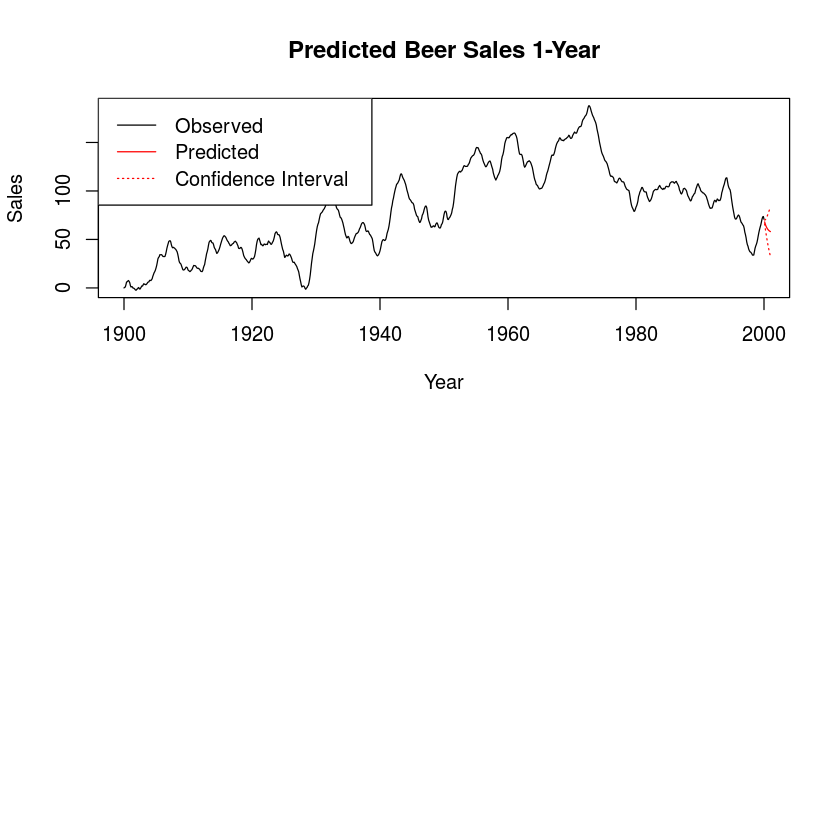

In [19]:
# Forecast beer sales into the future by 1 year
beer.pred=predict(Mod1, n.ahead=10)
beer.pred
# windows()
par(mfrow=c(2,1))
plot(a, type="l",main="Predicted Beer Sales 1-Year",xlab="Year",ylab="Sales")
lines(beer.pred$pred, col="red")
lines(beer.pred$pred + 2*beer.pred$se, col="red", lty=3) #Creates upper bound of confidence interval
lines(beer.pred$pred - 2*beer.pred$se, col="red", lty=3) #Creates lower bound of confidence interval
legend("topleft", legend=c("Observed", "Predicted", "Confidence Interval"), lty=c(1,1,3),
col=c("black","red", "red"))

$pred
Time Series:
Start = c(2000, 2) 
End = c(2010, 1) 
Frequency = 10 
  [1] 68.03825 65.79153 63.97843 62.51527 61.33450 60.38163 59.61266 58.99211
  [9] 58.49133 58.08720 57.76107 57.49788 57.28549 57.11409 56.97577 56.86415
 [17] 56.77407 56.70138 56.64272 56.59538 56.55717 56.52634 56.50146 56.48139
 [25] 56.46518 56.45211 56.44156 56.43304 56.42617 56.42062 56.41615 56.41254
 [33] 56.40962 56.40727 56.40537 56.40384 56.40260 56.40161 56.40080 56.40015
 [41] 56.39963 56.39920 56.39886 56.39859 56.39836 56.39819 56.39804 56.39792
 [49] 56.39783 56.39775 56.39769 56.39764 56.39760 56.39757 56.39754 56.39752
 [57] 56.39751 56.39749 56.39748 56.39747 56.39747 56.39746 56.39745 56.39745
 [65] 56.39745 56.39745 56.39744 56.39744 56.39744 56.39744 56.39744 56.39744
 [73] 56.39744 56.39744 56.39744 56.39744 56.39744 56.39744 56.39744 56.39744
 [81] 56.39744 56.39744 56.39744 56.39744 56.39744 56.39744 56.39744 56.39744
 [89] 56.39744 56.39744 56.39744 56.39744 56.39744 56.39744 56.39744 

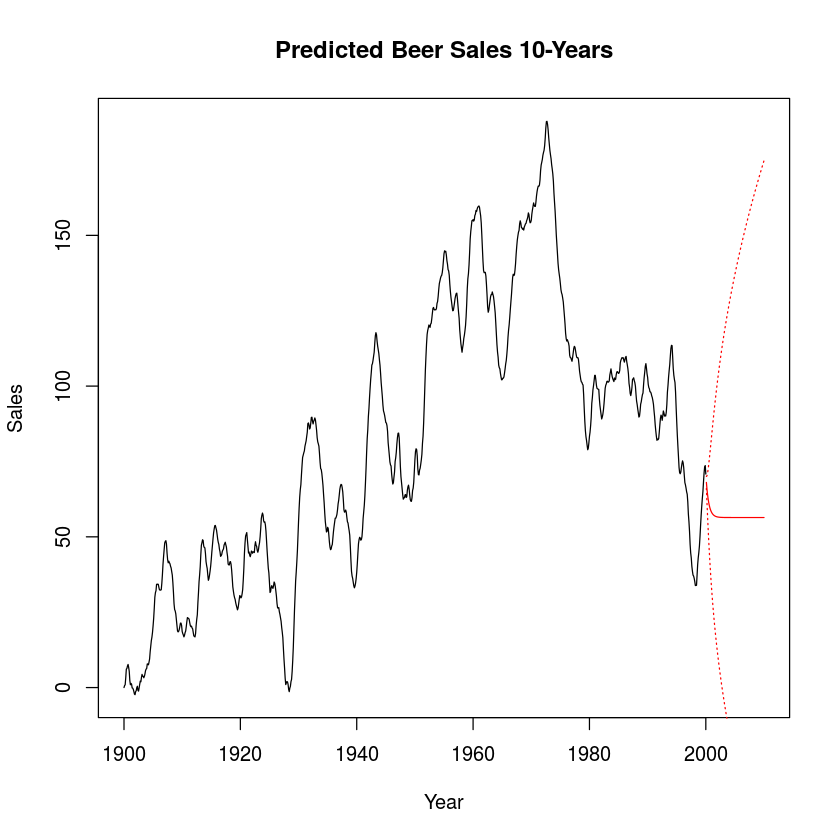

In [20]:
# Forecast beer sales into the future by 10 years
beer.pred2=predict(Mod1, n.ahead=100)
beer.pred2
plot(a, type="l",main="Predicted Beer Sales 10-Years",xlab="Year",ylab="Sales",xlim=c(1900, 2010))
lines(beer.pred2$pred, col="red")
lines(beer.pred2$pred + 2*beer.pred2$se, col="red", lty=3) #Creates upper bound of confidence interval
lines(beer.pred2$pred - 2*beer.pred2$se, col="red", lty=3) #Creates lower bound of confidence interval